In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# ============================================================================
# INSTALLATION AND SETUP
# ============================================================================

# Run this cell first in Google Colab
!pip install tensorflow keras matplotlib seaborn plotly scikit-learn numpy pandas
!pip install tensorflow-datasets pillow opencv-python

# Import all necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_regression

import cv2
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 6.32.0 which is incompatible.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 6.32.0 which is incompatible.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompa

2025-08-17 05:46:06.416184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755409566.640059      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755409566.703850      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

TensorFlow version: 2.18.0
GPU Available: []


2025-08-17 05:46:23.452173: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1. INTRODUCTION TO NEURAL NETWORKS

--- Single Neuron Demo ---
Inputs: [ 0.5 -0.2  0.8]
Weights: [ 0.49671415 -0.1382643   0.64768854]
Bias: 0
Output: 0.6887240290358045

--- XOR Problem with Simple Neural Network ---
Cost after epoch 0: 0.3107815870559333
Cost after epoch 100: 0.24875185284914125
Cost after epoch 200: 0.23634932040542922
Cost after epoch 300: 0.1377960015499878
Cost after epoch 400: 0.025097821277828836
Cost after epoch 500: 0.005667353641593771
Cost after epoch 600: 0.0020760504165203853
Cost after epoch 700: 0.0009850091773735742
Cost after epoch 800: 0.0005438208324438803
Cost after epoch 900: 0.0003320048419656957
Cost after epoch 1000: 0.000217949114056302
Cost after epoch 1100: 0.0001511841057630718
Cost after epoch 1200: 0.00010950814019582085
Cost after epoch 1300: 8.212740086464993e-05
Cost after epoch 1400: 6.337206137442017e-05
Cost after epoch 1500: 5.007226240168824e-05
Cost after epoch 1600: 4.036201292291608e-05
Cost after epoch 1700: 3.3094072713440146

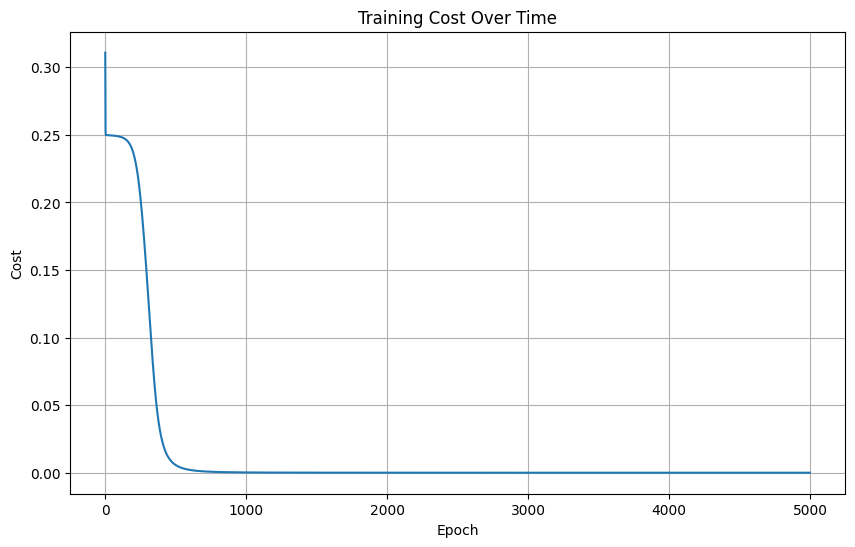

In [2]:

# ============================================================================
# 1. INTRODUCTION TO NEURAL NETWORKS
# ============================================================================

print("="*60)
print("1. INTRODUCTION TO NEURAL NETWORKS")
print("="*60)

# Basic Neuron Implementation
class Neuron:
    """
    A simple neuron implementation to understand the basics
    """
    def __init__(self, num_inputs):
        # Initialize weights randomly and bias to zero
        self.weights = np.random.randn(num_inputs)
        self.bias = 0
    
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow
    
    def forward(self, inputs):
        """Forward pass through the neuron"""
        # Calculate weighted sum + bias
        z = np.dot(inputs, self.weights) + self.bias
        # Apply activation function
        return self.sigmoid(z)

# Demo: Single Neuron
print("\n--- Single Neuron Demo ---")
neuron = Neuron(3)  # 3 inputs
inputs = np.array([0.5, -0.2, 0.8])
output = neuron.forward(inputs)
print(f"Inputs: {inputs}")
print(f"Weights: {neuron.weights}")
print(f"Bias: {neuron.bias}")
print(f"Output: {output}")

# Simple Neural Network from Scratch
class SimpleNeuralNetwork:
    """
    A simple 2-layer neural network implementation
    """
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        # Backward propagation
        m = X.shape[0]
        
        # Calculate gradients
        dZ2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def train(self, X, y, epochs=1000, learning_rate=0.1):
        costs = []
        
        for i in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Calculate cost
            cost = np.mean((output - y) ** 2)
            costs.append(cost)
            
            # Backward propagation
            dW1, db1, dW2, db2 = self.backward(X, y, output)
            
            # Update weights and biases
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            
            if i % 100 == 0:
                print(f"Cost after epoch {i}: {cost}")
        
        return costs

# Demo: XOR Problem
print("\n--- XOR Problem with Simple Neural Network ---")
# XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Create and train network
nn = SimpleNeuralNetwork(2, 4, 1)
costs = nn.train(X_xor, y_xor, epochs=5000, learning_rate=1.0)

# Test the network
predictions = nn.forward(X_xor)
print("\nXOR Results:")
for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]} -> Predicted: {predictions[i][0]:.4f}, Actual: {y_xor[i][0]}")

# Plot training cost
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.title('Training Cost Over Time')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


2. ARTIFICIAL NEURAL NETWORK (ANN)

--- Creating Sample Dataset ---
Training set shape: (800, 20)
Test set shape: (200, 20)
Number of classes: 3

--- Building ANN Model ---

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,019 (54.76 KB)

 Trainable params: 13,571 (53.01 KB)

 Non-trainable params: 448 (1.75 KB)


--- Training ANN Model ---
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4145 - loss: 1.3083 - val_accuracy: 0.6300 - val_loss: 0.9702 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5131 - loss: 0.9752 - val_accuracy: 0.7050 - val_loss: 0.8968 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6175 - loss: 0.9252 - val_accuracy: 0.7450 - val_loss: 0.8423 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6331 - loss: 0.8574 - val_accuracy: 0.7450 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6887 - loss: 0.7411 - val_accuracy: 0.7450 - val_loss: 0.7641 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7211 - loss: 0.6686 - val_accuracy: 0.7650 - val_loss: 0.7195 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

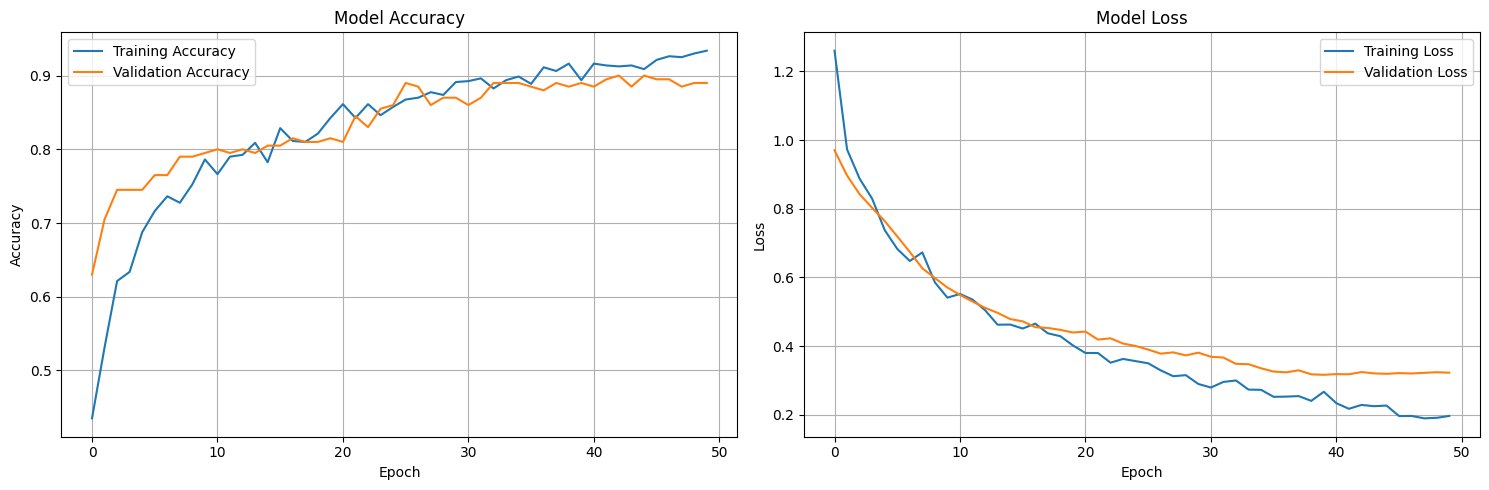

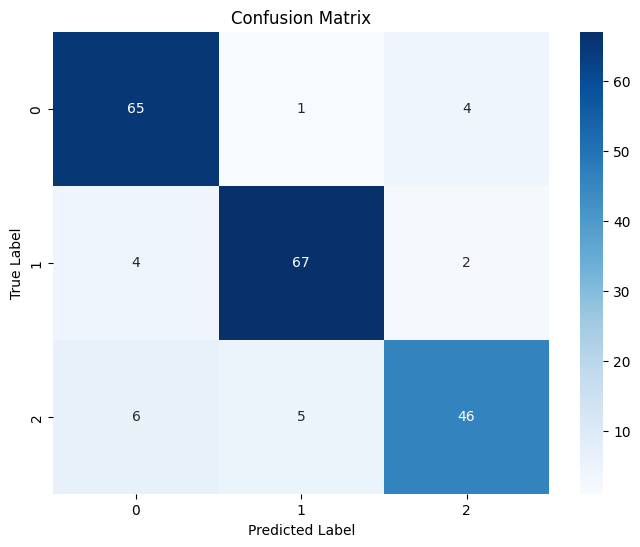

In [3]:




# ============================================================================
# 2. ARTIFICIAL NEURAL NETWORK (ANN)
# ============================================================================

print("\n" + "="*60)
print("2. ARTIFICIAL NEURAL NETWORK (ANN)")
print("="*60)

# Generate sample data for classification
print("\n--- Creating Sample Dataset ---")
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, n_classes=3, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Build ANN Model
def create_ann_model(input_dim, num_classes):
    """
    Create a comprehensive ANN model
    """
    model = models.Sequential([
        # Input layer
        layers.Dense(128, activation='relu', input_shape=(input_dim,), 
                    name='hidden_layer_1'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Hidden layers
        layers.Dense(64, activation='relu', name='hidden_layer_2'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu', name='hidden_layer_3'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    
    return model

# Create and compile the model
print("\n--- Building ANN Model ---")
ann_model = create_ann_model(X_train_scaled.shape[1], len(np.unique(y)))

ann_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
print("\nModel Architecture:")
ann_model.summary()

# Callbacks for training
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)

# Train the model
print("\n--- Training ANN Model ---")
history = ann_model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
print("\n--- Model Evaluation ---")
test_loss, test_accuracy = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions and metrics
y_pred = ann_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Plot training history
def plot_training_history(history):
    """Plot training and validation metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


3. CONVOLUTIONAL NEURAL NETWORK (CNN)

--- Loading CIFAR-10 Dataset ---
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

--- Sample CIFAR-10 Images ---


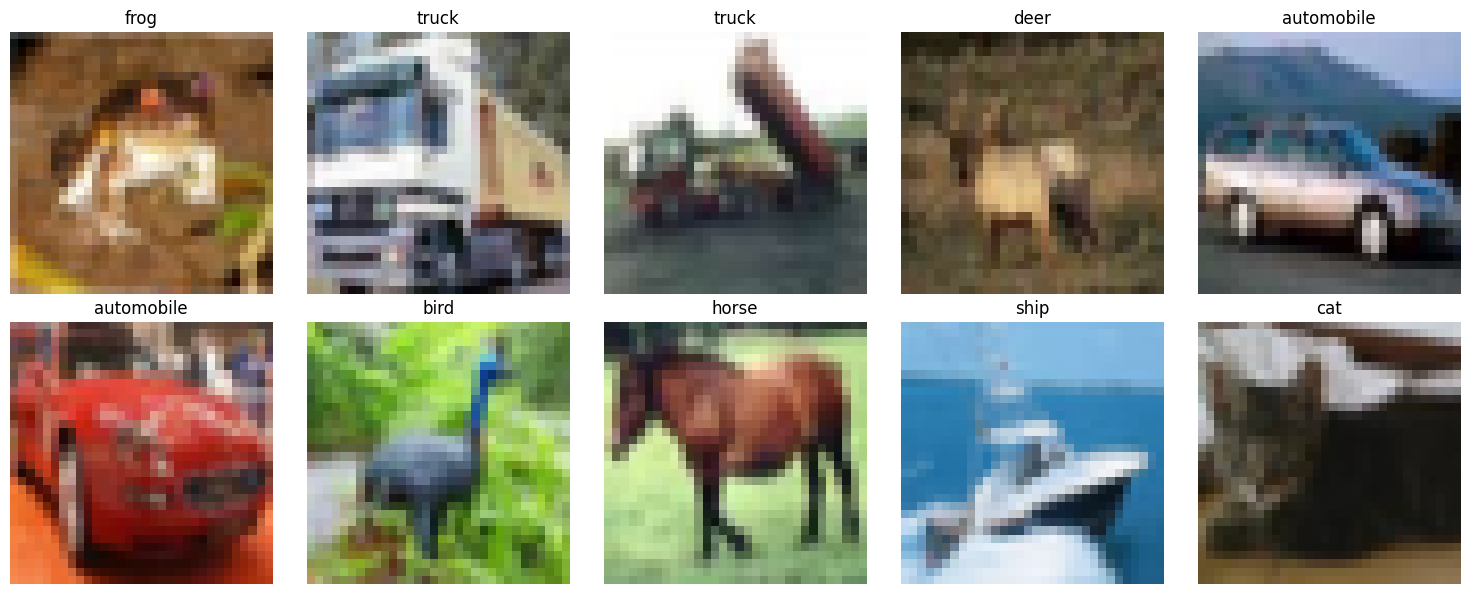


--- Building CNN Model ---

CNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,472,938 (5.62 MB)

 Trainable params: 1,471,466 (5.61 MB)

 Non-trainable params: 1,472 (5.75 KB)


--- Setting up Data Augmentation ---

--- Training CNN Model ---
Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 209s 130ms/step - accuracy: 0.2841 - loss: 2.1879 - val_accuracy: 0.4412 - val_loss: 1.5688 - learning_rate: 0.0010
Epoch 2/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4062 - loss: 1.5987 - val_accuracy: 0.4290 - val_loss: 1.6117 - learning_rate: 0.0010
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 204s 130ms/step - accuracy: 0.4853 - loss: 1.4324 - val_accuracy: 0.5850 - val_loss: 1.1772 - learning_rate: 0.0010
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5312 - loss: 1.4168 - val_accuracy: 0.5870 - val_loss: 1.1678 - learning_rate: 0.0010
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 202s 129ms/step - accuracy: 0.5658 - loss: 1.2272 - val_accuracy: 0.6434 - val_loss: 1.1743 - learning_rate: 0.0010
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4688 - loss: 1.9850 - val_accuracy: 0.6444 - val_loss: 1.1656 - learning_rate: 0.001

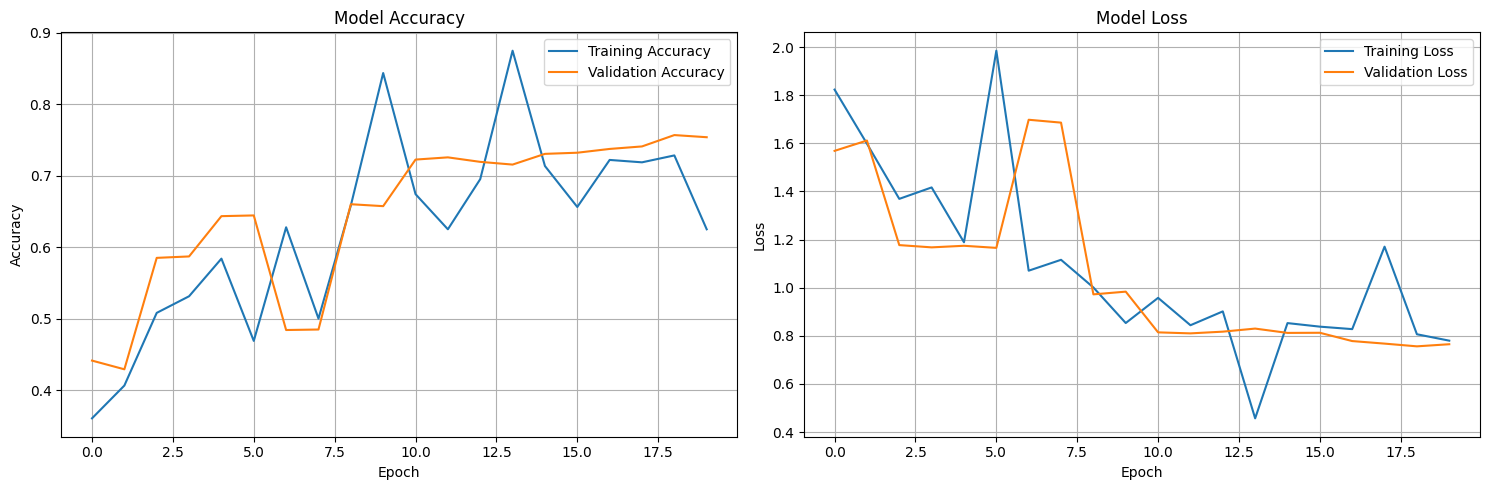


--- CNN Predictions Visualization ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


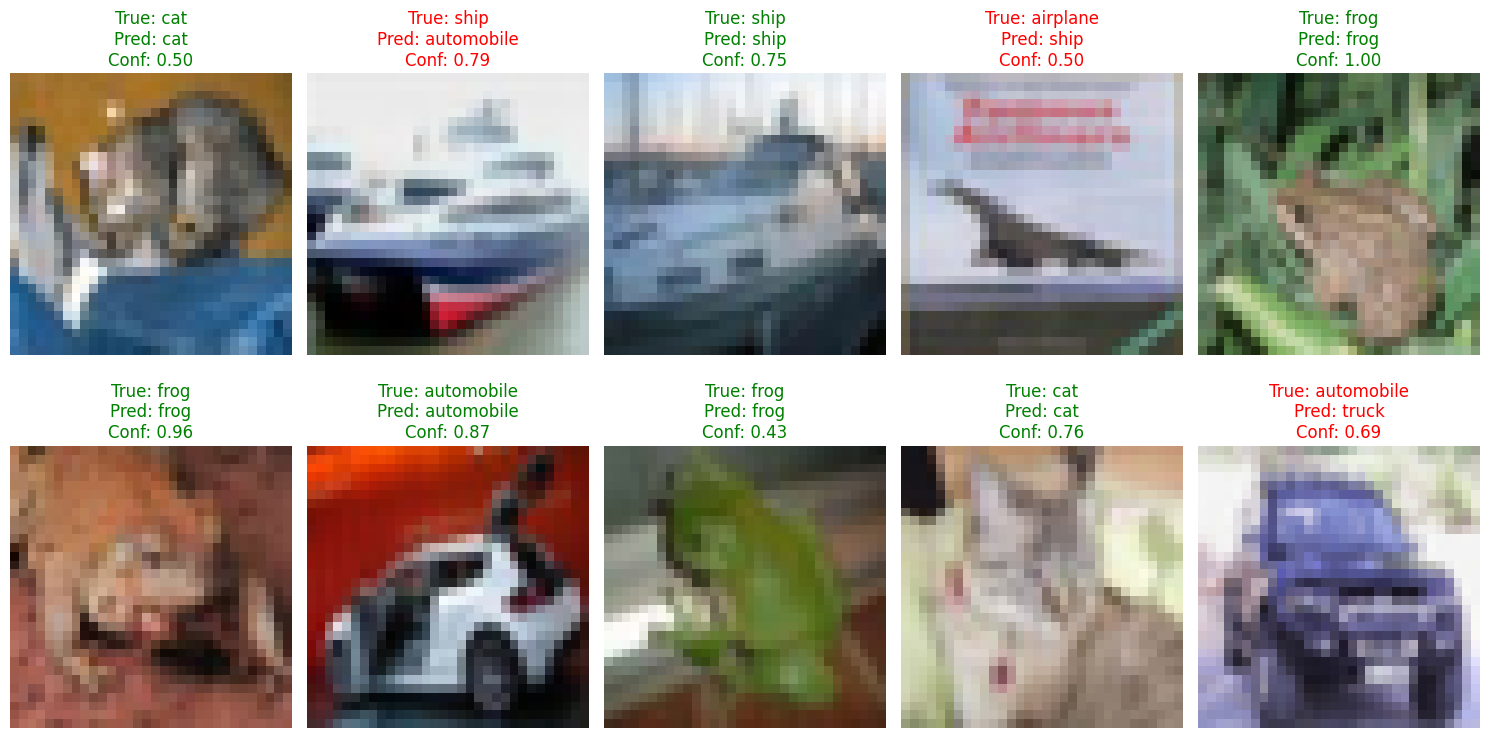

In [4]:


# ============================================================================
# 3. CONVOLUTIONAL NEURAL NETWORK (CNN)
# ============================================================================

print("\n" + "="*60)
print("3. CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("="*60)

# Load CIFAR-10 dataset
print("\n--- Loading CIFAR-10 Dataset ---")
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training images shape: {x_train_cifar.shape}")
print(f"Training labels shape: {y_train_cifar.shape}")
print(f"Test images shape: {x_test_cifar.shape}")
print(f"Test labels shape: {y_test_cifar.shape}")

# Normalize pixel values
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Convert labels to categorical
y_train_cifar = keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar = keras.utils.to_categorical(y_test_cifar, 10)

# Visualize some samples
def visualize_cifar10_samples(x_data, y_data, class_names, num_samples=10):
    """Visualize CIFAR-10 samples"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(num_samples):
        row = i // 5
        col = i % 5
        
        axes[row, col].imshow(x_data[i])
        axes[row, col].set_title(f'{class_names[np.argmax(y_data[i])]}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n--- Sample CIFAR-10 Images ---")
visualize_cifar10_samples(x_train_cifar, y_train_cifar, cifar10_classes)

# Build CNN Model
def create_cnn_model(input_shape, num_classes):
    """
    Create a comprehensive CNN model
    """
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                     padding='same', name='conv2d_1'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_2'),
        layers.MaxPooling2D((2, 2), name='maxpool_1'),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_3'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_4'),
        layers.MaxPooling2D((2, 2), name='maxpool_2'),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_5'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_6'),
        layers.MaxPooling2D((2, 2), name='maxpool_3'),
        layers.Dropout(0.25),
        
        # Flatten and Dense layers
        layers.Flatten(name='flatten'),
        layers.Dense(512, activation='relu', name='dense_1'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', name='dense_2'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax', name='output')
    ])
    
    return model

# Create and compile CNN model
print("\n--- Building CNN Model ---")
cnn_model = create_cnn_model((32, 32, 3), 10)

cnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nCNN Model Architecture:")
cnn_model.summary()

# Data Augmentation
print("\n--- Setting up Data Augmentation ---")
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train_cifar)

# Callbacks
cnn_callbacks = [
    callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001),
    callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_accuracy')
]

# Train CNN model (reduced epochs for demo)
print("\n--- Training CNN Model ---")
cnn_history = cnn_model.fit(
    datagen.flow(x_train_cifar, y_train_cifar, batch_size=32),
    steps_per_epoch=len(x_train_cifar) // 32,
    epochs=20,  # Reduced for demo
    validation_data=(x_test_cifar, y_test_cifar),
    callbacks=cnn_callbacks,
    verbose=1
)

# Evaluate CNN model
print("\n--- CNN Model Evaluation ---")
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_cifar, y_test_cifar, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f}")
print(f"CNN Test Loss: {cnn_test_loss:.4f}")

# Plot CNN training history
plot_training_history(cnn_history)

# Visualize CNN predictions
def visualize_predictions(model, x_test, y_test, class_names, num_samples=10):
    """Visualize model predictions"""
    predictions = model.predict(x_test[:num_samples])
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    for i in range(num_samples):
        row = i // 5
        col = i % 5
        
        axes[row, col].imshow(x_test[i])
        
        true_label = class_names[np.argmax(y_test[i])]
        pred_label = class_names[np.argmax(predictions[i])]
        confidence = np.max(predictions[i])
        
        color = 'green' if true_label == pred_label else 'red'
        axes[row, col].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}', 
                                color=color)
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n--- CNN Predictions Visualization ---")
visualize_predictions(cnn_model, x_test_cifar, y_test_cifar, cifar10_classes)